In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [9]:
#create dataframe
df = pd.read_csv('Iris.csv')

In [10]:
#showing the dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df = df.drop('Id', axis =1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
#split dataset into attribute and label
x = df.drop('Species', axis=1)
y = df['Species']

In [42]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [44]:
#scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
#training dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_predict = knn.predict(x_test)
  scores[k]=metrics.accuracy_score(y_test, y_predict)
  scores_list.append(metrics.accuracy_score(y_test, y_predict))

Text(0, 0.5, 'Test accuracy')

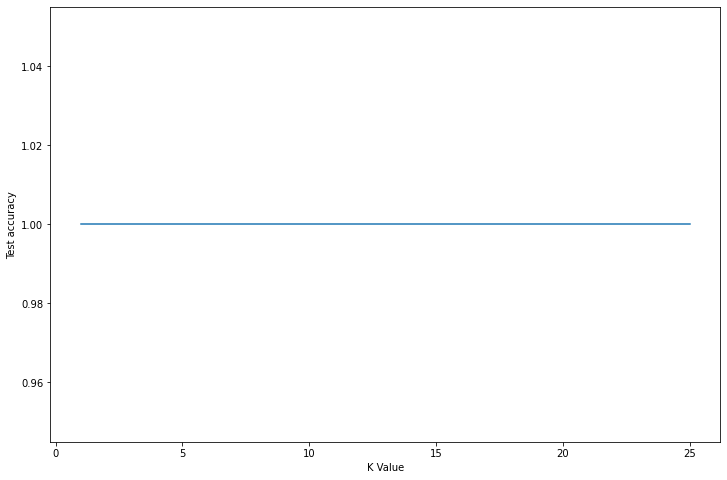

In [51]:
plt.figure(figsize=(12,8))
plt.plot(k_range, scores_list)

plt.xlabel('K Value')
plt.ylabel('Test accuracy')